In [2]:

import numpy as np
from sklearn.preprocessing import \
MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels.api as smt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [3]:

 #BTC download
btc_data = yf.download('BTC',start='2022-01-01',end='2022-03-31')
btc_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,98.309998,98.309998,98.294701,98.294701,98.294701,177
2022-01-04,98.279999,98.291496,98.279999,98.291496,98.291496,356148
2022-01-05,98.250000,98.269997,98.090103,98.096397,98.096397,356863
2022-01-06,97.985001,97.985001,97.985001,97.985001,97.985001,104
2022-01-07,97.894600,97.894600,97.894600,97.894600,97.894600,3


### Get the summary statistics of the data

In [4]:

btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,96.719136,96.729799,96.704259,96.713417,96.713417,14642.426230
std,1.016645,1.013351,1.006362,1.001394,1.001394,66530.075216
min,94.519997,94.620903,94.519997,94.620903,94.620903,1.000000
25%,96.261902,96.261902,96.261902,96.261902,96.261902,5.000000
50%,96.827698,96.827698,96.817802,96.817802,96.817802,31.000000
75%,97.474197,97.474197,97.474197,97.474197,97.474197,177.000000
max,98.309998,98.309998,98.294701,98.294701,98.294701,356863.000000


In [5]:
#Dropping the Adj close
btc_data = btc_data.drop(['Adj Close'],1)
#new_df.head()


C:\Users\nudou\AppData\Local\Temp\ipykernel_7156\889858304.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  btc_data = btc_data.drop(['Adj Close'],1)


In [6]:
x =  np.array(btc_data.drop(['Close'], 1))
#print(x)
y = np.array(btc_data['Close'])
x

C:\Users\nudou\AppData\Local\Temp\ipykernel_7156\4201404866.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x =  np.array(btc_data.drop(['Close'], 1))


array([[9.83099976e+01, 9.83099976e+01, 9.82947006e+01, 1.77000000e+02],
       [9.82799988e+01, 9.82914963e+01, 9.82799988e+01, 3.56148000e+05],
       [9.82500000e+01, 9.82699966e+01, 9.80901031e+01, 3.56863000e+05],
       [9.79850006e+01, 9.79850006e+01, 9.79850006e+01, 1.04000000e+02],
       [9.78945999e+01, 9.78945999e+01, 9.78945999e+01, 3.00000000e+00],
       [9.78399963e+01, 9.79000015e+01, 9.78300018e+01, 8.36200000e+03],
       [9.78499985e+01, 9.79223022e+01, 9.78499985e+01, 1.03000000e+02],
       [9.79250031e+01, 9.79250031e+01, 9.79199982e+01, 1.04000000e+02],
       [9.79909973e+01, 9.79909973e+01, 9.79909973e+01, 2.00000000e+00],
       [9.78085022e+01, 9.78085022e+01, 9.77350006e+01, 1.33000000e+02],
       [9.74400024e+01, 9.74400024e+01, 9.74106979e+01, 1.63000000e+02],
       [9.75049973e+01, 9.75049973e+01, 9.74942017e+01, 1.03000000e+02],
       [9.75026016e+01, 9.75026016e+01, 9.75026016e+01, 2.00000000e+00],
       [9.76900024e+01, 9.76900024e+01, 9.76900024e

In [7]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test se
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)# 70% training and 30% test
print(y_test)

[96.85500336 96.39040375 94.83920288 96.68540192 97.49420166 98.0963974
 96.52390289 94.64700317 96.75109863 97.30989838 97.89459991 97.41069794
 96.35500336 96.79380035 96.64230347 96.81780243 95.540802   97.91999817
 97.71019745]


In [8]:

timestep = 30
X_train = []
Y_train = []
X_test = []
Y_test = []
btc_x_test = []
btc_y_test = []
btc_x_data = btc_data.drop(['Close'],1).to_numpy()
btc_x_data = btc_x_data.reshape((len(btc_x_data),4))
btc_y_data = btc_data['Close']
for x in range(timestep,len(x_train)):
    X_train.append(x_train[x-timestep:x,3])
    Y_train.append(y_train[x])
for x in range(timestep,len(x_test)):
    X_test.append(x_test[x-timestep:x,3])
    Y_test.append(y_test[x])
for x in range(timestep,len(btc_x_data)):
    btc_x_test.append(btc_x_data[x-timestep:x,3])
    btc_y_test.append(btc_y_data[x])
X_train, Y_train, X_test, Y_test, btc_x_test, btc_y_test = np.array(X_train), np.array(Y_train).reshape(-1,1),np.array(X_test), np.array(Y_test).reshape(-1,1), np.array(btc_x_test), np.array(btc_y_test).reshape(-1,1)
print(X_train.shape)
print(Y_train.shape)
print(btc_x_test.shape)

(12, 30)
(12, 1)
(31, 30)


C:\Users\nudou\AppData\Local\Temp\ipykernel_7156\1802469845.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  btc_x_data = btc_data.drop(['Close'],1).to_numpy()


### Feature scaling

In [9]:
#scaling overall data
scaler = MinMaxScaler()

#scaling BTC data
btc_scaled_x, btc_scaled_y = np.array(scaler.fit_transform(btc_x_test)), np.array(scaler.fit_transform(btc_y_test))
print(btc_scaled_x.shape)
print(btc_scaled_y.shape)
print(btc_scaled_y[:10])

(31, 30)
(31, 1)
[[0.64918499]
 [0.67879492]
 [0.7286237 ]
 [0.75673985]
 [0.71241492]
 [0.66243763]
 [0.69657745]
 [0.70159574]
 [0.86785065]
 [1.        ]]


### Training a Random Forest Regressor

In [10]:

rfr_model = RandomForestRegressor(n_estimators=300,max_depth=15)
rfr_model.fit(btc_scaled_x,  btc_scaled_y)
rfr_prediction = rfr_model.predict(btc_scaled_x)
#checking for model accuracy
rmse = np.sqrt(mean_squared_error(btc_scaled_y, rfr_prediction))
mae = mean_absolute_error(btc_scaled_y, rfr_prediction)
rfr_prediction = rfr_model.predict(btc_scaled_x)
print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)


C:\Users\nudou\AppData\Local\Temp\ipykernel_7156\1351166621.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(btc_scaled_x,  btc_scaled_y)


Root Mean Square Error: 0.1024673209445113
Mean Absolute Error: 0.08718815756252712


In [11]:
#checking for variance score. The fewer value indicates how bad a model is
from sklearn.metrics import explained_variance_score

print('Explained Variance Score : ', explained_variance_score(btc_scaled_y, rfr_prediction))

Explained Variance Score :  0.8768150171514751


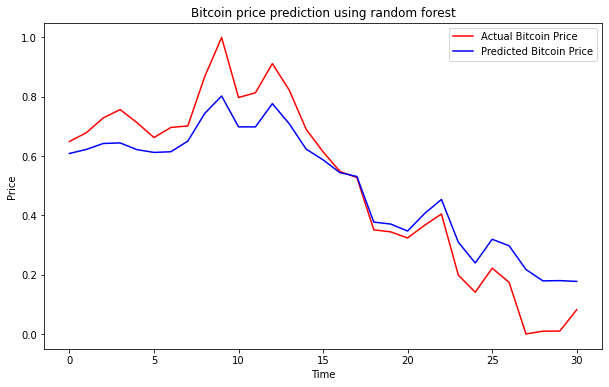

In [12]:
#plotting the graph
plt.figure(figsize=(10,6))
plt.plot(btc_scaled_y, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(rfr_prediction, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin price prediction using random forest')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()